In [33]:
!pip install numpy matplotlib pillow tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571

  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/cc/b8/33127d52de868d2aabc14ec6f53cb2dffafd14c5c708f50d171552a3a451/optree-0.11.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.9 MB/s eta 0:00:00
  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 22.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 38.0 MB/s eta 0:00:000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
train_dir = "data/train" 
test_dir = "data/test"  

In [22]:
def load_data(directory, num_file):
    images = []
    labels = []
    label_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    
    # Iterate over each label directory
    for label_id in range(len(label_names)):
        emotion_dir = os.path.join(directory, label_names[label_id])
        print(emotion_dir)
        
        # Check if the directory exists
        if not os.path.exists(emotion_dir):
            continue
        counter = 0
        # Iterate over each image file in the directory
        for file_name in os.listdir(emotion_dir):
            if counter >=num_file:
                break
            counter+=1
            file_path = os.path.join(emotion_dir, file_name)
            try:
                # Open the image file
                with Image.open(file_path) as img:
                    img = img.convert('L')  # Convert to grayscale if not already
                    images.append(np.array(img).flatten())
                    labels.append(label_id)
            except IOError:
                print(f"Error opening or reading image file {file_path}")
    
    return np.array(images), np.array(labels), label_names

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
def knn_classify(x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return accuracy

In [82]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

def cnn_classify(x_train, y_train, x_test, y_test):
    # Edit the shape to 24 if want to process the reduced-dimension data
    x_train = x_train.reshape((-1, 48, 48, 1))
    x_test = x_test.reshape((-1, 48, 48, 1))
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    y_train = to_categorical(y_train, num_classes=7)
    y_test = to_categorical(y_test, num_classes=7)

    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.1)

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")

    return model


In [9]:
def show_image(image_array):
    image_2d = image_array.reshape(48, 48)  
    plt.imshow(image_2d, cmap='gray') 
    plt.axis('off')  
    plt.show()

data/train/Angry
data/train/Disgust
data/train/Fear
data/train/Happy
data/train/Sad
data/train/Surprise
data/train/Neutral
data/test/Angry
data/test/Disgust
data/test/Fear
data/test/Happy
data/test/Sad
data/test/Surprise
data/test/Neutral
(2800, 2304) (2800,) (700, 2304) (700,)


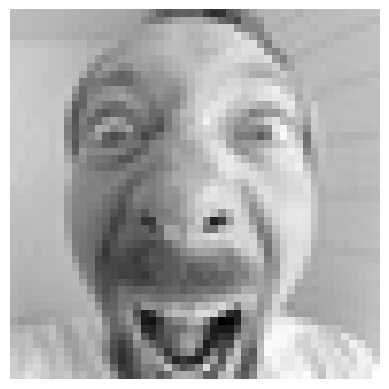

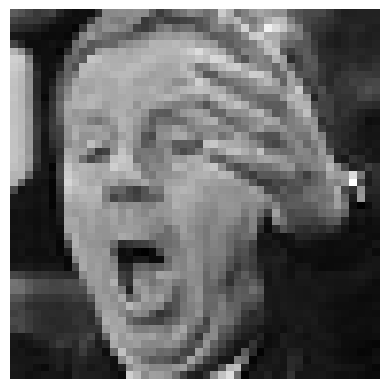

In [73]:
x_train, y_train, label_names = load_data(train_dir,400)
x_test, y_test, label_names = load_data(test_dir,100)
# Load the original first image 
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
show_image(x_train[0])
show_image(x_test[0])

In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
n_components = 576


In [26]:
def apply_pca(images, n_components):
    
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(images)
    rebuilt_data = pca.inverse_transform(reduced_data)
    
    return reduced_data, rebuilt_data


In [74]:
pca_x_train, pca_rebuilt_images = apply_pca(x_train, n_components)
pca_x_test, _ = apply_pca(x_test, n_components)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 411ms/step - accuracy: 0.1733 - loss: 3.0380 - val_accuracy: 0.0000e+00 - val_loss: 2.5643
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 407ms/step - accuracy: 0.2065 - loss: 2.5819 - val_accuracy: 0.0000e+00 - val_loss: 2.4926
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 407ms/step - accuracy: 0.2483 - loss: 2.4101 - val_accuracy: 0.0000e+00 - val_loss: 2.4850
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 411ms/step - accuracy: 0.2674 - loss: 2.2877 - val_accuracy: 0.0000e+00 - val_loss: 3.0734
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 410ms/step - accuracy: 0.3329 - loss: 2.1103 - val_accuracy: 0.0000e+00 - val_loss: 3.3975
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 412ms/step - accuracy: 0.3288 - loss: 2.0757 - val_accuracy: 0.0000e+00 - val_loss: 3.3603
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 410ms/step - accuracy: 0.3369 - loss: 2.0066 - val_accuracy: 0.0000e+00 - val_loss: 3.9155
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 409ms/step - accuracy: 0.36

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4385 - loss: 1.8679
Test Accuracy: 0.4200


(-0.5, 47.5, 47.5, -0.5)

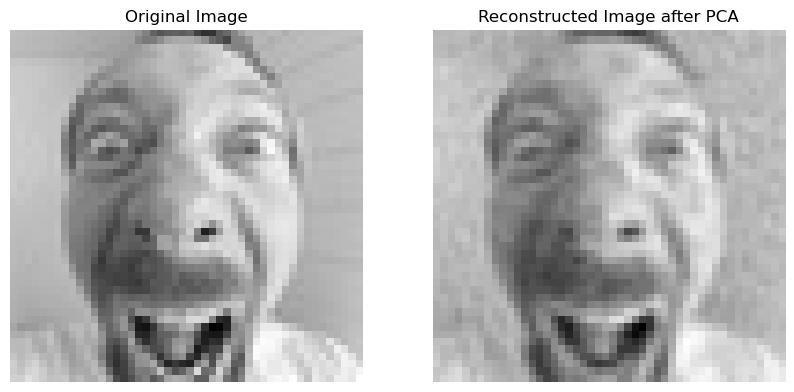

In [83]:
model = cnn_classify(x_train, y_train, x_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(images[0].reshape(48, 48), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(pca_rebuilt_images[0].reshape(48, 48), cmap='gray')
axes[1].set_title('Reconstructed Image after PCA')
axes[1].axis('off')


In [106]:
def apply_mds(images, n_components):
    mds = MDS(n_components=n_components, n_init=1, max_iter=100, n_jobs=-1, normalized_stress=False)
    reduced_data = mds.fit_transform(images)
    return reduced_data

def apply_isomap(images, n_components):
    isomap = Isomap(n_components=n_components, n_neighbors=5, n_jobs=-1)
    reduced_data = isomap.fit_transform(images)
    return reduced_data


def apply_lle(images, n_components):
    lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=5, n_jobs=-1)
    reduced_data = lle.fit_transform(images)
    return reduced_data

    

In [93]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import trustworthiness
def evaluate(original_data, reduced_data, labels):
    score = silhouette_score(reduced_data, labels)
    print("Silhouette Score: ", score)
    db_index = davies_bouldin_score(reduced_data, labels)
    print("Davies-Bouldin Index: ", db_index)
    trust_score = trustworthiness(original_data, reduced_data, n_neighbors=5)
    print("Trustworthiness: ", trust_score)

In [99]:
pca_x_train, pca_rebuilt_images = apply_pca(x_train, n_components)
pca_x_test, _ = apply_pca(x_test, n_components)
evaluate(x_train, pca_x_train, y_train)

Silhouette Score:  -0.028446380795796748
Davies-Bouldin Index:  14.988393870561731
Trustworthiness:  0.9999818870241506


In [94]:
mds_x_train = apply_mds(x_train, n_components)
mds_x_test = apply_mds(x_test, n_components)
evaluate(x_train, mds_x_train, y_train)

Silhouette Score:  -0.029181836099315055
Davies-Bouldin Index:  20.439054329760797
Trustworthiness:  0.9959395210806385


In [108]:
isomap_x_train = apply_isomap(x_train, n_components)
#isomap_x_test = apply_isomap(x_test, n_components)
evaluate(x_train, isomap_x_train, y_train)

/Users/jax_king/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/jax_king/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Silhouette Score:  -0.02120250120378571
Davies-Bouldin Index:  20.293276038587113
Trustworthiness:  0.9826075777732296


In [102]:
lle_x_train = apply_lle(x_train, n_components)
lle_x_test = apply_lle(x_test, n_components)
evaluate(x_train, lle_x_train, y_train)

Silhouette Score:  -0.02596865168899886
Davies-Bouldin Index:  23.942582017848405
Trustworthiness:  0.9398851309864921


In [103]:
knn_classify(lle_x_train, y_train, lle_x_test, y_test)

              precision    recall  f1-score   support

           0       0.16      0.43      0.23       100
           1       0.24      0.19      0.21       100
           2       0.12      0.19      0.14       100
           3       0.16      0.13      0.14       100
           4       0.25      0.15      0.19       100
           5       0.12      0.05      0.07       100
           6       0.18      0.02      0.04       100

    accuracy                           0.17       700
   macro avg       0.18      0.17      0.15       700
weighted avg       0.18      0.17      0.15       700



0.1657142857142857